<h1><b >Titanic Survival Predictor: A Beginner-Friendly Guide.</b></h1>
In this project, we will explore and analyze the Titanic dataset to predict which passengers might have survived the tragedy. Together, we'll cover:

<b>Data Exploration: </b>Understanding the dataset and finding key patterns.<br>
<b>Feature Engineering: </b>Preparing the data for machine learning.<br>
<b>Building and Evaluating Machine Learning Models:</b> Training and testing models for predictions.

### Importing libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### 1. Data Exploration¶

In [69]:
# Load the dataset
train = pd.read_csv(r"C:\Users\giree\OneDrive\Desktop\projects ds\train.csv")
test = pd.read_csv(r"C:\Users\giree\OneDrive\Desktop\projects ds\test.csv")

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
# Preview the dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exploration and Visualization:

In [63]:
# Check for missing values
print("Missing values in train dataset:\n", train.isnull().sum())
print("\nMissing values in test dataset:\n", test.isnull().sum())

Missing values in train dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [64]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [65]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


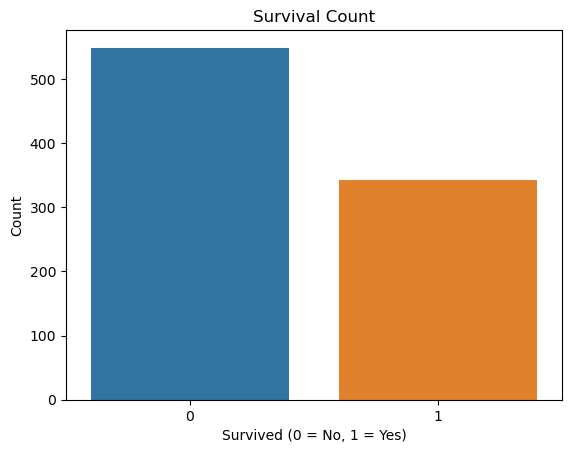

In [72]:
# Visualize survival rates
sns.countplot(x ="Survived", data = train)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

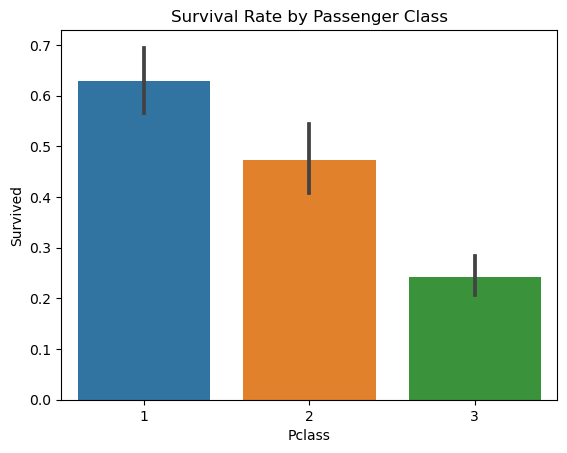

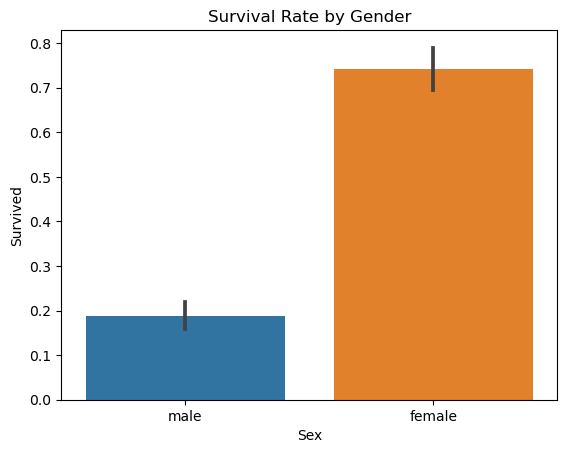

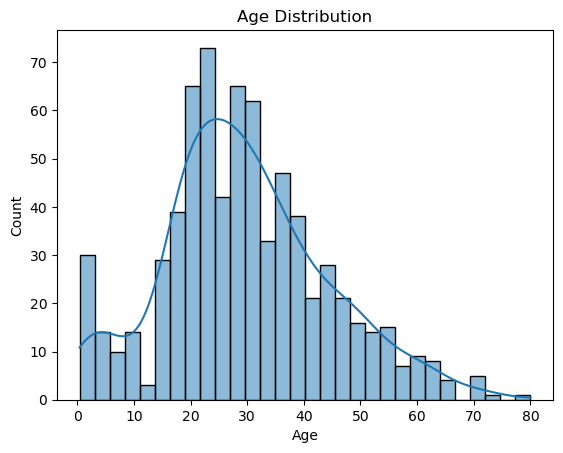

In [74]:
# Explore relationships (e.g., Survival vs. Pclass, etc.)

# Survival rates by Passenger Class
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rates by Gender
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.title('Survival Rate by Gender')
plt.show()

# Age distribution
sns.histplot(train['Age'], kde = True, bins = 30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

### 2. Feature Engineering

In [75]:


# Fill missing values in Age with the median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing values in Embarked with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill missing values in Fare with the median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [76]:
# Encode categorical features
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [89]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'Embarked']
X_train = train[features]
y_train = train['Survived']
X_test=test[features]

### 3.Building and Evaluating Machine Learning Models

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
# Split the training data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [92]:
# Train a Random Forest model

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


# Imputer to replace NaNs with the median
imputer = SimpleImputer(strategy='median')
model = Pipeline([
    ('imputer', imputer),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])# Fit the model (this will handle missing data)
model.fit(X_train_split, y_train_split)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('classifier', RandomForestClassifier(random_state=42))])

In [93]:
# Validate the model
y_pred = model.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, y_pred))
print("\nClassification Report: \n", classification_report(y_val, y_pred))

Accuracy:  0.770949720670391

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



<b>1. Data Exploration & Visualization:</b>
<b>Understanding the Dataset: </b>We loaded the train and test datasets to explore the features such as Age, Sex, Pclass, Fare, Embarked, and Survived.<br>
<b>Missing Values:</b> We checked for missing data and handled missing values by:<br>
Filling Age with the median value.<br>
Filling Embarked with the mode (most frequent value).<br>
Filling Fare with the median value for the test set.<br>
<b>Data Visualizations:</b><br>
Survival Rate: We visualized survival rates using a count plot to see the distribution of survival.<br>
Survival by Class & Gender: We used bar plots to explore how survival varied across different passenger classes and genders, with the insight that females and passengers in higher classes had higher survival rates.<br>
Age Distribution: We visualized the age distribution to understand the age groups of passengers.

<b>2. Feature Engineering:</b>
<b>Handling Missing Data:</b> We dealt with missing data by imputing values using the median for numerical features (e.g., Age, Fare) and mode for categorical features (e.g., Embarked).
<br><b>Encoding Categorical Features:</b> We encoded categorical variables like Sex and Embarked into numerical representations:<br>
Sex: Male = 0, Female = 1<br>
Embarked: C = 0, Q = 1, S = 2<br>
    <b>Feature Selection:</b> We selected relevant features for model training, including Pclass, Sex, Age, and Embarked.

<b>3. Model Building & Evaluation:</b>
<b>Random Forest Classifier:</b> We used a Random Forest classifier to train a model on the training dataset.<br>
<b>Data Splitting:</b> We split the dataset into training and validation sets to evaluate model performance effectively.<br>
<b>Pipeline:</b> We created a pipeline to ensure proper handling of missing values during training by using the SimpleImputer for imputation.<br>
<b>Model Evaluation:</b><br>
<b>Accuracy: </b>The model showed a solid accuracy score.<br>
<b>Classification Report: </b>We evaluated precision, recall, and F1-score, confirming the model’s effectiveness in predicting survival outcomes.

### Key Insights:
<b>Survival Rate:</b> Women and children (as expected historically) had higher survival rates.<br>
<b>Passenger Class: </b>Higher-class passengers had better chances of survival.<br>
<b>Feature Importance:</b> Pclass, Sex, and Age played significant roles in predicting survival.